In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `sersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input the radius, $R_e$, $n$ and the total stellar mass of the system.


In [25]:
def sersicE(r, re, n, mtot):
    """ Function that computes the Sersic Profile for an Elliptical 
    System, assuming M/L ~ 1
    PARMETERS
    ---------
        r: `float`
            Distance from the center of the galaxy (kpc)
        re: `float`
            The Effective radius (2D radius that contains 
            half the light) (kpc)
        n:  `float`
            sersic index
        mtot: `float`
            the total stellar mass (Msun)

    RETURNS
    -------
        I: `array of floats`
            the surface brightness profile of the elliptical in Lsun/kpc^2

    """

    # We are assuming M/L = 1, so the total luminosity is:
    lum = mtot
    
    # the effective surface brightness is
    Ie = lum/7.2/np.pi/re**2
    
    # Break down the equation 
    a = (r/re)**(1.0/n)
    b = -7.67*(a-1)
    
    # The surface brightness
    #I = Ie*np.exp(-7.67*((r/re)**(1.0/n)-1.0))
    I = Ie*np.exp(b)
    
    return I
    
    

# Part B

Determine the Surface Mass Density Profile for the MW bulge

In [10]:
# Create a center of mass object 
# This lets us store the x, y, z, bulge particles 
M31_COM = CenterOfMass("M31_000.txt", 3)
M31_COM_p = M31_COM.COM_P(0.1)
x = M31_COM.x-M31_COM_p[0].value
y = M31_COM.y-M31_COM_p[1].value
z = M31_COM.z-M31_COM_p[2].value
m = M31_COM.m

#print(x[0],y[0],z[0])

-9.135999999999967 -1.4250000000000682 4.2760000000000105


In [34]:
# Compute the surface density profile 

# calculate the radial distances in cylindrical coordinates (and theta, too)
cyl_r_mag = np.sqrt(x**2 + y**2) #np.sum(self.alg_r[:, :2]**2, axis=1))
cyl_theta = np.arctan2(y,x) # self.alg_r[:, 1], self.alg_r[:, 0])

radii = np.arange(0.1, 0.95 * cyl_r_mag.max(), 0.1)
       
# create the mask to select particles for each radius
# np.newaxis creates a virtual axis to make tmp_r_mag 2 dimensional
# so that all radii can be compared simultaneously
enc_mask = cyl_r_mag[:, np.newaxis] < np.asarray(radii).flatten()

# calculate the enclosed masses 
# relevant particles will be selected by enc_mask (i.e., *1)
# outer particles will be ignored (i.e., *0)
m_enc = np.sum(m[:, np.newaxis] * enc_mask, axis=0)

# use the difference between nearby elements to get mass in each annulus
m_annuli = np.diff(m_enc) # one element less then m_enc
Sigma = m_annuli / (np.pi * (radii[1:]**2 - radii[:-1]**2))

r_annuli = np.sqrt(radii[1:] * radii[:-1]) 
# here we choose the geometric mean

# Part C

a) Plot the simulation surface mass density profile of M31's bulge as a proxy for its surface brightness profile (M/L = 1) 

b) Match the result to a Sersic Profile


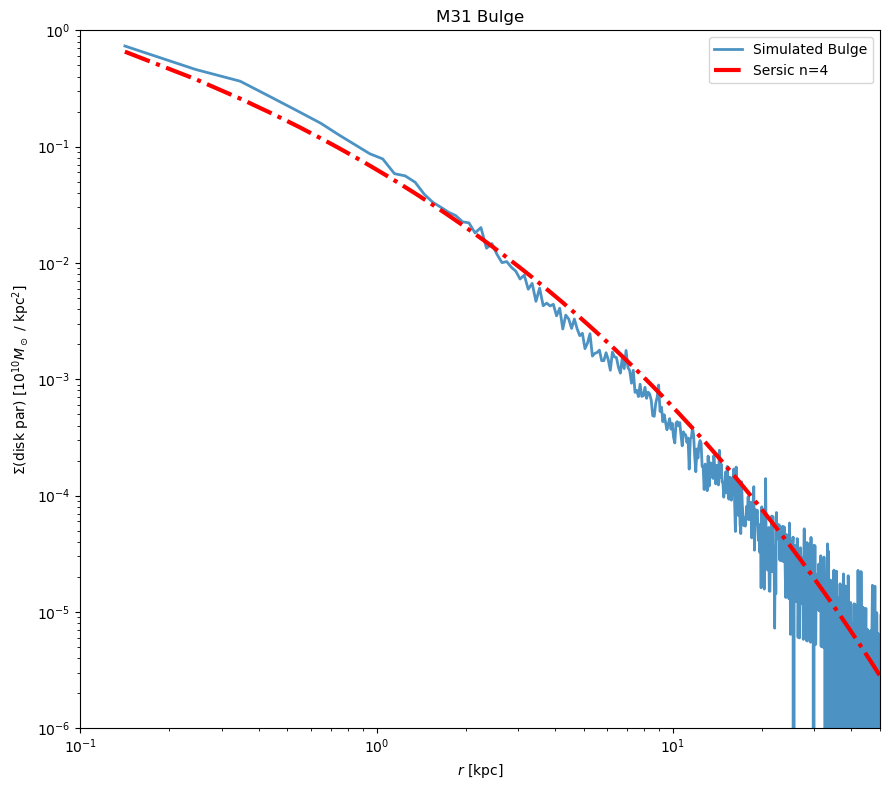

In [36]:
fig, ax = plt.subplots(figsize=(9, 8))

# Surface Density Profile
ax.loglog(r_annuli, Sigma, lw=2, alpha=0.8,label='Simulated Bulge')

# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic n = 4 - de Vaucouleurs
plt.semilogy(r_annuli,sersicE(r_annuli,re_bulge,4,bulge_total)/1e10, color='red',
             linestyle="-.",linewidth=3, label='Sersic n=4')

ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\Sigma$(disk par) [$10^{10} M_\odot$ / kpc$^2$]", title="M31 Bulge")

#set axis limits
plt.xlim(0.1,50)
plt.ylim(1e-6,1)

ax.legend(loc='best')
fig.tight_layout()

#plt.savefig('Lab6.png')